# Transfer function of cascade formant resonator

In [13]:
import numpy as np
import math
import matplotlib.pyplot as plt

#amplitude response
def amp_res(A,B,C,omega_Hz,array,formant, t_s):
    '''
    input: 
    A, B, C: list, 3 coefficients
    omega_Hz: float, angular frequency, = 2*pi*frequency
    array: array, to store result
    formant: int, formant number, 1-5 
    t_s: float, sampling period Ts
    
    output: int, amplitude values in dB for every frequency
    '''
    assert type(array) == np.ndarray
    for i in range(5000):
        amp = A[formant]/math.sqrt(math.pow((1-C[formant])*math.cos(omega_Hz[i]*t_s)-B[formant],2)+math.pow((1+C[formant])*math.sin(omega_Hz[i]*t_s),2))
        array[0][i] = 20*np.log10(amp)
    return array
        
#phase response
def phase_res(A,B,C,omega_Hz,array,formant, t_s):
    '''
    input: 
    A, B, C: list, 3 coefficients
    omega_Hz: float, angular frequency, = 2*pi*frequency
    array: array, to store result
    formant: int, formant number, 1-5 
    t_s: float, sampling period Ts
    
    output: int, phase values in degree for every frequency
    '''
    assert type(array) == np.ndarray
    for i in range(5000):
        pha = -math.atan2((1+C[formant])*math.sin(omega_Hz[i]*t_s),(1-C[formant])*math.cos(omega_Hz[i]*t_s)-B[formant])
        array[0][i] = (180*pha)/math.pi 
    return array

def lp_amp(A,B,C,omega_Hz,array,formant, t_s):
    '''
    input: 
    A, B, C: list, 3 coefficients
    omega_Hz: float, angular frequency, = 2*pi*frequency
    array: array, to store result
    formant: int, formant number, 1-5 
    t_s: float, sampling period Ts
    
    output: int, amplitude values in dB for every frequency
    '''
    assert type(array) == np.ndarray
    for i in range(5000):
        amp = A[formant]/math.sqrt(1+math.pow(B[formant],2)-2*B[formant]*math.cos(omega_Hz[i]*t_s))
        array[0][i] = 20*np.log10(amp)
    return array

def lp_pha(A,B,C,omega_Hz,array,formant, t_s):
    '''
    input: 
    A, B, C: list, 3 coefficients
    omega_Hz: float, angular frequency, = 2*pi*frequency
    array: array, to store result
    formant: int, formant number, 1-5 
    t_s: float, sampling period Ts
    
    output: int, phase values in degree for every frequency
    '''
    assert type(array) == np.ndarray
    for i in range(5000):
        pha = -math.atan2(B[formant]*math.sin(omega_Hz[i]*t_s),1-B[formant]*math.cos(omega_Hz[i]*t_s))
        array[0][i] = (180*pha)/math.pi 
    return array

#frequency response
def frequency_response(name,f_n,b_n):
    '''
    input: 
    name: str, vowel name
    f_n: list, cutoff frequency (F)
    b_n: list, bandwidth (BW)
    
    output: 
    amplitude response graph, phase response graph, amplitude response array, phase response array
    '''
    assert type(f_n) == type(b_n) == list
    f_step = 1                      #int, frequency step
    f_s = 10000                     #int, sampling frequency (Fs): 10 kHz
    f_Hz = np.arange(0,5000,f_step) #array, frequency range(0Hz,5000Hz), with frequency step 1 Hz, altogether 5000 samples
    omega_Hz = 2*math.pi*f_Hz       #array, angular frequency = 2*pi*f
    t_s = 1/f_s                     #float, sampling period (Ts) = 1/sampling frequency = 0.1 ms = 0.0001 s
    
    #compute sigma & omega
    sigma, omega = [], []
    for i in range(5):
        sigma.append(-np.pi*b_n[i]) #σ = -pi*BW
        omega.append(2*np.pi*f_n[i])#ω = 2*pi*F
    
    #compute A,B,C
    A, B, C = [], [], []
    for i in range(5):
        C.append(-math.exp(2*sigma[i]*t_s))                     #C = -exp(-2*pi*BW*Ts) = -exp(2*σ*Ts)
        B.append(2*math.exp(sigma[i]*t_s)*np.cos(omega[i]*t_s)) #B = 2*exp(-pi*BW*Ts)*cos(2*pi*F*Ts) = 2*exp(σ*Ts)*cos(ω*Ts)
        A.append(1-B[i]-C[i])                                   #A = 1- B - C

    # first order low-pass filter               
    B.append(math.exp(-2*math.pi*100*t_s)) 
    A.append(1-B[5])
    
    #create arrays for storing amplitude response of 5 formants
    amp_1 = np.empty([1,5000],dtype = float)
    amp_2 = np.empty([1,5000],dtype = float)
    amp_3 = np.empty([1,5000],dtype = float)
    amp_4 = np.empty([1,5000],dtype = float)
    amp_5 = np.empty([1,5000],dtype = float)
    amp_lp = np.empty([1,5000],dtype = float)
    
    #compute amplitude response of 5 formants
    amp_res(A,B,C,omega_Hz,amp_1, 0, t_s)
    amp_res(A,B,C,omega_Hz,amp_2, 1, t_s)
    amp_res(A,B,C,omega_Hz,amp_3, 2, t_s)
    amp_res(A,B,C,omega_Hz,amp_4, 3, t_s)
    amp_res(A,B,C,omega_Hz,amp_5, 4, t_s)
    lp_amp(A,B,C,omega_Hz,amp_lp,5, t_s)
    
    #sum up 5 sets of amplitude response
    amp_sum = np.empty([1,5000],dtype = float)
    for i in range(5000):
        amp_sum[0][i] = amp_1[0][i]+amp_2[0][i]+amp_3[0][i]+amp_4[0][i]+amp_5[0][i]+amp_lp[0][i]
    
    plt.figure('individual formant')
    plt.plot(f_Hz, amp_1[0], label='F1')
    plt.plot(f_Hz, amp_2[0], label='F2')
    plt.plot(f_Hz, amp_3[0], label='F3')
    plt.xlabel('frequency (Hz)')
    plt.ylabel('amplitude (dB)')
    plt.legend()
    plt.title('Formant resonator spectrum of the first three formants')
    
    plt.figure('Normal voicing source spectrum')
    plt.plot(f_Hz, amp_lp[0])
    plt.xlabel('frequency (Hz)')
    plt.ylabel('amplitude (dB)')
    plt.title('Normal voicing source spectrum')
    plt.text(1000,-15,'- 6 dB/octave')

    #plot amplitude response and save the graph
    plt.figure("Amplitude response")
    plt.xlabel('frequency (Hz)')
    plt.ylabel('amplitude (dB)')
    plt.plot(f_Hz,amp_sum[0])
    plt.title("Amplitude response - "+ str(name))
    #plt.ylim([-30,25])
    plt.savefig('cascade_amplitude_' + str(name)+'.jpg')
    
    
    #create arrays for storing phase response of 5 formants
    pha_1 = np.empty([1,5000],dtype = float)
    pha_2 = np.empty([1,5000],dtype = float)
    pha_3 = np.empty([1,5000],dtype = float)
    pha_4 = np.empty([1,5000],dtype = float)
    pha_5 = np.empty([1,5000],dtype = float)
    pha_lp = np.empty([1,5000],dtype = float)

    
    #compute phase response of 5 formants
    phase_res(A,B,C,omega_Hz,pha_1, 0, t_s)
    phase_res(A,B,C,omega_Hz,pha_2, 1, t_s)
    phase_res(A,B,C,omega_Hz,pha_3, 2, t_s)
    phase_res(A,B,C,omega_Hz,pha_4, 3, t_s)
    phase_res(A,B,C,omega_Hz,pha_5, 4, t_s)
    lp_pha(A,B,C,omega_Hz,pha_lp,5, t_s)
    
    
    #sum up 5 sets of phase response
    pha_sum = np.empty([1,5000],dtype = float)
    for i in range(5000):
        pha_sum[0][i] = pha_1[0][i]+pha_2[0][i]+pha_3[0][i]+pha_4[0][i]+pha_5[0][i]+pha_lp[0][i]
    for i in range(5000):
        if -540 <= pha_sum[0][i] < -180:
            pha_sum[0][i] = pha_sum[0][i] + 360
        elif -900 <= pha_sum[0][i] < -540:
            pha_sum[0][i] = pha_sum[0][i] + 720
        elif -1260 <= pha_sum[0][i] < -900:
            pha_sum[0][i] = pha_sum[0][i] + 1080
    
    #plot phase response and save the graph
    plt.figure("Phase response")
    plt.xlabel('frequency (Hz)')
    plt.ylabel('phase (degree)')
    plt.plot(f_Hz,pha_sum[0])
    plt.title("Phase response - "+str(name))
    plt.savefig('cascade_phase_'+str(name)+'.jpg')
    plt.show()
    
    return amp_sum, pha_sum
    

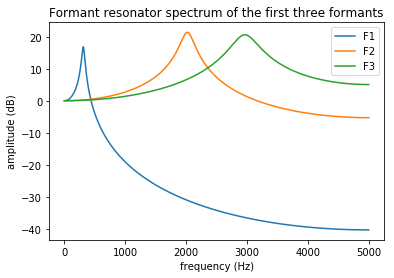

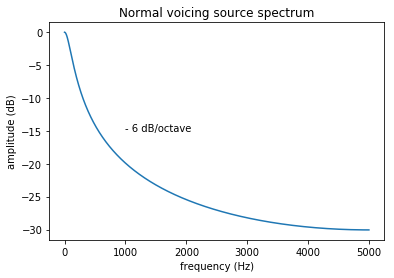

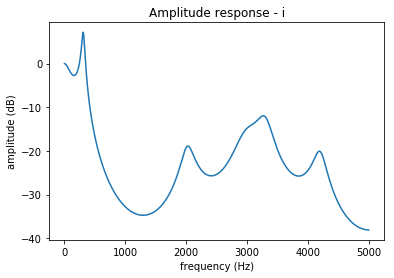

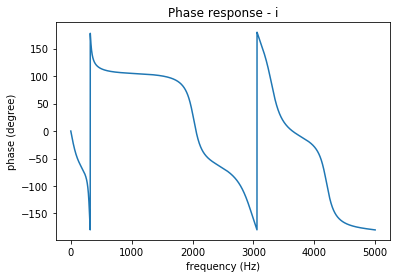

7.185704187150799 -19.251086085226405 -15.414099263896356 -11.948498073321435 -20.06325093206261


In [14]:
#i
f_i = [310,2020,2960,3300,4200]  #cutoff frequency
b_i = [45,200,400,250,200] #bandwidth
(amp_i,pha_i) = frequency_response('i',f_i,b_i)

#find maximal amplitude
F1_i = max(amp_i[0][0:1000]) 
F2_i = max(amp_i[0][1000:2000])
F3_i = max(amp_i[0][2000:2961])
F4_i = max(amp_i[0][3000:4000])
F5_i = max(amp_i[0][4000:5000])
print(F1_i,F2_i,F3_i,F4_i,F5_i)

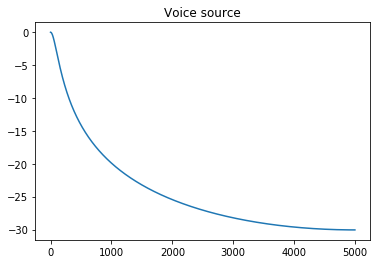

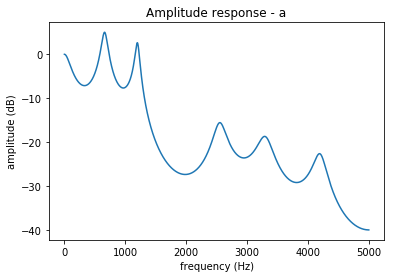

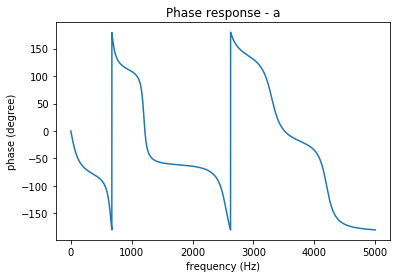

5.031047636960764 2.639353479726662 -15.583866130934183 -18.723458686470465 -22.66341588764732


In [5]:
#a
f_a = [660,1200,2550,3300,4200]  #cutoff frequency
b_a = [100,70,200,250,200] 
(amp_a,pha_a) = frequency_response('a',f_a,b_a)

F1_a = max(amp_a[0][0:1000]) 
F2_a = max(amp_a[0][1000:2000])
F3_a = max(amp_a[0][2000:3000])
F4_a = max(amp_a[0][3000:4000])
F5_a = max(amp_a[0][4000:5000])
print(F1_a,F2_a,F3_a,F4_a,F5_a)

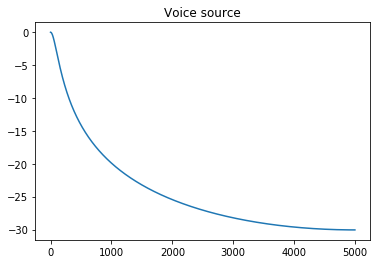

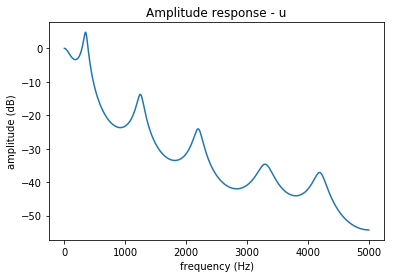

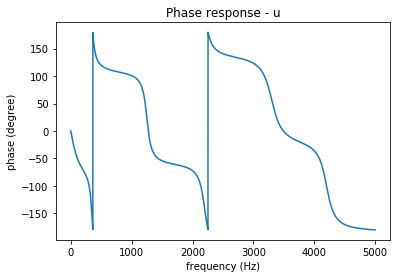

4.820670807621209 -13.777541659838766 -24.071897207076645 -34.63877450248029 -37.12456576126364


In [6]:
#u
f_u = [350,1250,2200,3300,4200]  #cutoff frequency
b_u = [65,110,140,250,200] #bandwidth
(amp_u,pha_u) = frequency_response('u',f_u,b_u)

F1_u = max(amp_u[0][0:1000]) 
F2_u = max(amp_u[0][1000:2000])
F3_u = max(amp_u[0][2000:3000])
F4_u = max(amp_u[0][3000:4000])
F5_u = max(amp_u[0][4000:5000])
print(F1_u,F2_u,F3_u,F4_u,F5_u)

# Waveform of cascade formant resonator

In [7]:
import numpy as np
import math 
import matplotlib.pyplot as plt

def difference(formant, inp, A, B, C):
    '''
    input:
    formant: int, the nth formant
    inp: list, input value
    A, B, C: list, 3 coefficients
    
    output:list, amplitude value for each 1 ms
    '''
    assert type(inp) == type(A) == type(B) == type(C) == list
    output = []
    index = formant - 1
    for i in range(1003):
        output.append(0)
    for i in range(1001):
        output[i+2] = A[index]*inp[i+1]+B[index]*output[i+1]+C[index]*output[i]
    return output

def lp_filter(formant, inp, A, B, C):
    '''
    input:
    formant: int, the nth formant
    inp: list, input value
    A, B, C: list, 3 coefficients
    
    output:list, amplitude value for each 1 ms
    '''
    assert type(inp) == type(A) == type(B) == type(C) == list
    output = []
    index = formant - 1
    for i in range(1003):
        output.append(0)
    for i in range(1001):
        output[i+2] = A[index]*inp[i+2]+B[index]*output[i+1]
    return output

def waveform(name, f_n, b_n):
    '''
    input: 
    name: str, vowel name
    f_n: list, cutoff frequency (F)
    b_n: list, bandwidth (BW)
    
    output: 
    waveform graph, amplitude list in V
    '''
    assert type(f_n) == type(b_n) == list
    f_s = 10000                           #int, sampling frequency (Fs): 10 kHz
    t_s = 1/f_s                           #float, sampling period (Ts) = 1/sampling frequency = 0.1 ms 
    time = np.arange(-0.2,100.1,t_s*1000)      #waveform length: 100.2 ms 

    #compute sigma, omega
    sigma, omega = [], []
    for i in range(5):
        sigma.append(-np.pi*b_n[i])
        omega.append(2*np.pi*f_n[i])
    
    #compute A,B,C
    A, B, C = [], [], []
    for i in range(5):
        C.append(-math.exp(2*sigma[i]*t_s))
        B.append(2*math.exp(sigma[i]*t_s)*np.cos(omega[i]*t_s))
        A.append(1-B[i]-C[i])
        
    # first order low-pass filter               
    B.append(math.exp(-2*math.pi*100*t_s)) 
    A.append(1-B[5])
    
    #impulse_train, altogether 100 ms, an impulse / 10 ms, namely 100 Hz for f0
    impulse_train = [0, 0, 1000]     #predefine amplitude at -2, -1, 0 ms  
    for impulse in range(100):      #10 ms/impulse
        for interval in range(99):  #1 ms = 1 sample
            impulse_train.append(0)
        impulse_train.append(1000)   #1000/impulse
        
    #waveform of five formant resonator in cascade
    output_lp = lp_filter(6, impulse_train, A, B, C)
    output_1 = difference(1, output_lp, A, B, C)
    output_2 = difference(2, output_1, A, B, C)
    output_3 = difference(3, output_2, A, B, C)
    output_4 = difference(4, output_3, A, B, C)
    output_5 = difference(5, output_4, A, B, C)
    
    plt.figure('Normal voicing source waveform')
    plt.xlabel('time (ms)')
    plt.ylabel('amplitude')
    plt.plot(time[2:300], output_lp[2:300])
    plt.title('Normal voicing source waveform')
    
    plt.figure("Output waveform")
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude')
    plt.plot(time[2:300],output_5[2:300]) #from 0 ms to 1000 ms, excluding the previous 2 sequence
    plt.title("Output waveform - " + str(name))
    plt.savefig(str(name)+'-waveform.jpg')   
    plt.show()
    return output_5

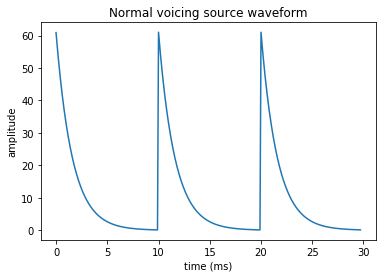

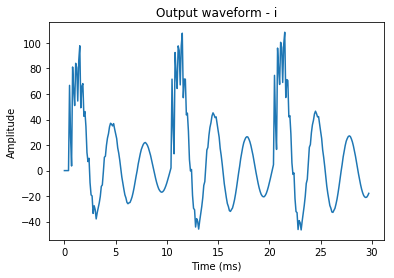

[0,
 0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 66.75571599724385,
 26.188805817287715,
 3.6132161841961548,
 81.1524866252169,
 63.15179031012194,
 50.943897660149474,
 84.04407677758306,
 80.6092955008011,
 54.49162396865853,
 86.25952150311548,
 97.77961461866914,
 49.1885110093294,
 65.94883897685438,
 68.12778149341355,
 42.5581582802727,
 46.255718223575904,
 34.468685915226885,
 14.16454910609054,
 7.051575491894543,
 9.640567423997613,
 -9.415011501730067,
 -19.009466598808906,
 -19.873445106356492,
 -33.55029716616596,
 -27.539578526007443,
 -30.443312586767348,
 -37.85011587362726,
 -32.981799294563544,
 -29.148541185161655,
 -25.269421560380806,
 -20.245006711866385,
 -12.400212928784853,
 -11.219576596113697,
 -0.9979043666881022,
 10.449837509557192,
 11.311414009159542,
 19.706210608877797,
 25.427686613482457,
 28.895335275959145,
 34.23663453917438,
 37.09624832817167,
 36.23891820267064,
 35.00362996108096,
 36.79331110114305,
 32.53704577738441,
 28.775765830508405,
 25.092844

In [8]:
#i
f_i = [310,2020,2960,3300,4200]  #cutoff frequency
b_i = [45,200,400,250,200] #bandwidth
waveform('i',f_i,b_i)

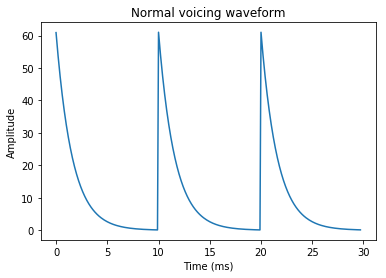

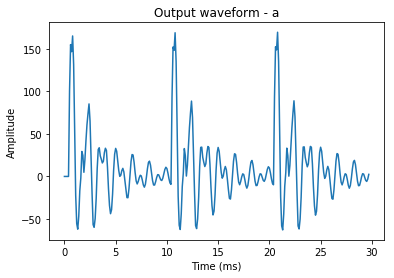

[0,
 0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 100.39089118375489,
 154.96241622507787,
 146.67408073297202,
 165.16468663205376,
 131.6256382798993,
 55.899435057342515,
 -22.125755955263287,
 -55.45526510462578,
 -62.00145025471053,
 -46.59470232408451,
 -16.941894559296514,
 -1.8451559403290503,
 29.350723493759965,
 24.837667453540217,
 4.871497476971204,
 19.761801794957286,
 41.66992737919274,
 60.632599880312895,
 73.79479018414949,
 85.26299676198767,
 65.25306568353503,
 22.34583331941326,
 -20.881163907944718,
 -56.68298481165436,
 -59.78060539877192,
 -49.49136520280725,
 -25.827508740169947,
 9.53713199827429,
 31.727618508815013,
 33.71695241353363,
 24.08308157793849,
 20.280301216771452,
 15.84413917674284,
 17.82090827950409,
 27.947091102190896,
 33.14855703777862,
 30.601073124270567,
 11.259421972328642,
 -14.328194954838978,
 -34.25133627552824,
 -43.789577668770825,
 -39.135627235985055,
 -20.64561224830112,
 7.02317767136681,
 26.107417550061335,
 32.989223855373,
 29.619

In [45]:
#a
f_a = [660,1200,2550,3300,4200]  #cutoff frequency
b_a = [100,70,200,250,200] 
waveform('a',f_a,b_a)

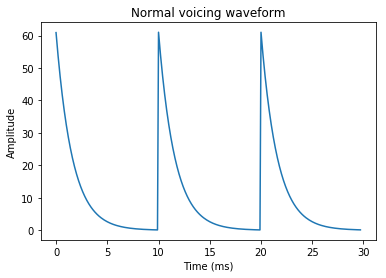

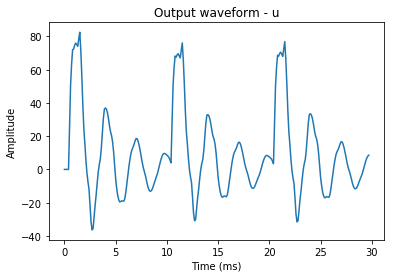

[0,
 0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 24.790134791129663,
 50.564062843979066,
 63.28580282771957,
 71.96488588202561,
 72.47018624600636,
 74.74597237849684,
 75.97182080489074,
 75.1904005929771,
 74.06727529776784,
 78.63624432405655,
 82.51485805092325,
 71.5748507844715,
 55.90150987494681,
 38.1583791425961,
 23.904740742993425,
 15.155418455770665,
 5.3797146543498755,
 -2.410666474329066,
 -7.596125023490133,
 -11.889810819084271,
 -21.332021268200968,
 -31.67040699532207,
 -36.39453177237753,
 -35.47873549215089,
 -28.15741120903077,
 -21.220236018876353,
 -15.151923655273706,
 -7.991824759515101,
 -1.6473379161557222,
 2.84048553200065,
 6.200492633445253,
 12.72946090878913,
 21.60917910408989,
 30.630189521980377,
 36.25409283406589,
 36.936593586588586,
 36.22612262102673,
 34.042025145152664,
 30.435931168692502,
 26.174053265259694,
 22.703341493279545,
 20.29294126205807,
 16.618169364219625,
 10.542633677931288,
 2.09374119637714,
 -5.6702176032937714,
 -11.3337133682

In [46]:
#u
f_u = [350,1250,2200,3300,4200]  #cutoff frequency
b_u = [65,110,140,250,200] #bandwidth
waveform('u',f_u,b_u)